In [2]:
## Import packages
%matplotlib inline
import pandas as pd
import geopandas as gpd
import fiona
pd.options.display.max_rows = 4

In [3]:
folder_path = '/Users/sofiawright/Documents/Hack_Oregon/Datasets/'
filepath = folder_path + 'SVI_Oregon_Shapefile/OREGON.shp'

In [4]:
data = gpd.read_file(filepath)
data.head(3) ## First three rows.

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,geometry
0,41,OREGON,OR,41041,Lincoln,41041990100,"Census Tract 9901, Lincoln County, Oregon",0.000000,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,1.0,"(POLYGON ((-124.084686 44.42022100000003, -124..."
1,41,OREGON,OR,41045,Malheur,41045940000,"Census Tract 9400, Malheur County, Oregon",30.308011,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,0.0,"POLYGON ((-117.613385 42.03518100000008, -117...."
2,41,OREGON,OR,41051,Multnomah,41051980000,"Census Tract 9800, Multnomah County, Oregon",1.574731,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,12462.0,"POLYGON ((-122.723271 45.57101300000005, -122...."


In [5]:
# Limit data to just the Portland area counties.
portland = data[(data.COUNTY=="Multnomah") | (data.COUNTY=="Clackamas") \
                | (data.COUNTY=="Columbia") | (data.COUNTY=="Washington") \
                | (data.COUNTY=="Yamhill")]

In [38]:
portland.head(3)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,geometry
2,41,OREGON,OR,41051,Multnomah,41051980000,"Census Tract 9800, Multnomah County, Oregon",1.574731,0.0,12.0,...,-999.0,-999.0,-999.0,-999.0,0.0,12.0,-999.0,-999.0,12462.0,"POLYGON ((-122.723271 45.57101300000005, -122...."
22,41,OREGON,OR,41005,Clackamas,41005020100,"Census Tract 201, Clackamas County, Oregon",1.758055,3872.0,256.0,...,0.0,0.0,0.0,0.0,116.0,92.0,3.0,2.4,5166.0,"POLYGON ((-122.707838 45.42447900000008, -122...."
23,41,OREGON,OR,41005,Clackamas,41005020200,"Census Tract 202, Clackamas County, Oregon",2.184330,6458.0,472.0,...,0.0,0.0,0.0,0.0,486.0,332.0,7.5,5.0,7214.0,"POLYGON ((-122.723574 45.40485000000007, -122...."


In [46]:
# create masks for the fields that pertain to each variable.
poverty = portland.columns.str.contains('POV')
unemployed = portland.columns.str.contains('UNEMP')
income = portland.columns.str.contains('PCI')
no_hsdp = portland.columns.str.contains('NOHSDP')
age65 = portland.columns.str.contains('AGE65')
age17 = portland.columns.str.contains('AGE17')
disability = portland.columns.str.contains('DISABL')
single_parent = portland.columns.str.contains('SNGPNT')
minority = portland.columns.str.contains('MINRTY')
limited_english = portland.columns.str.contains('LIMENG')
multi_unit = portland.columns.str.contains('MUNIT')
mobile_home = portland.columns.str.contains('MOBILE')
crowding = portland.columns.str.contains('CROWD')
no_vehicle = portland.columns.str.contains('NOVEH')
group_quarters = portland.columns.str.contains('GROUPQ')

# combine these masks for each theme.
soc_econ_mask = poverty | unemployed | income | no_hsdp
household_mask = age65 | age17 | disability | single_parent
minority_status_mask = minority | limited_english
housing_transit_mask = multi_unit | mobile_home | crowding | no_vehicle | group_quarters

# make a mask for the basic fields of interest to you, like location, area sq miles, and population
# Definitely include the geometry.
basics_mask = (portland.columns=='LOCATION') | (portland.columns=='AREA_SQMI') \
| (portland.columns=='E_TOTPOP') \
| (portland.columns=='geometry')


In [58]:
# Limit columns to just those for the socioeconomic theme, including the basic fields.
soc_econ = portland[portland.columns[basics_mask | soc_econ_mask]]

In [49]:
soc_econ.head(3) ## First four rows.

,LOCATION,AREA_SQMI,E_TOTPOP,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,...,MP_NOHSDP,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,F_POV,F_UNEMP,F_PCI,F_NOHSDP,geometry
2,"Census Tract 9800, Multnomah County, Oregon",1.574731,0.0,0.0,12.0,0.0,12.0,-999.0,-999.0,0.0,...,-999.0,-999.0000,-999.0000,-999.0000,-999.0000,-999.0,-999.0,-999.0,-999.0,"POLYGON ((-122.723271 45.57101300000005, -122...."
22,"Census Tract 201, Clackamas County, Oregon",1.758055,3872.0,238.0,181.0,57.0,52.0,66520.0,9844.0,57.0,...,2.4,0.1141,0.0316,0.0121,0.0740,0.0,0.0,0.0,0.0,"POLYGON ((-122.707838 45.42447900000008, -122...."
23,"Census Tract 202, Clackamas County, Oregon",2.184330,6458.0,522.0,272.0,148.0,97.0,81860.0,13103.0,72.0,...,1.7,0.2027,0.1614,0.0036,0.0461,0.0,0.0,0.0,0.0,"POLYGON ((-122.723574 45.40485000000007, -122...."


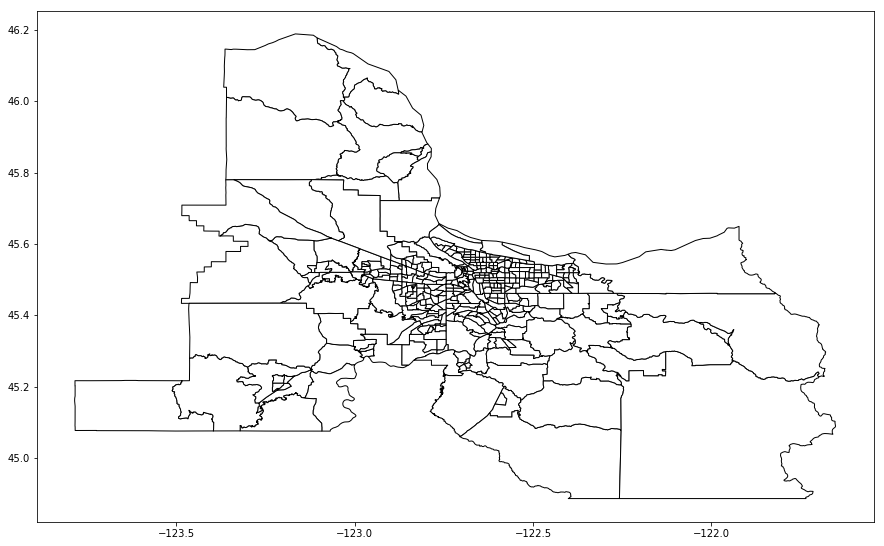

In [61]:
soc_econ.plot(color='white', edgecolor='black', figsize=(15,15))

In [44]:
# Print field names
datatypes = soc_econ.dtypes
for i in range(0,len(datatypes)):
    print(datatypes.index[i])

LOCATION
AREA_SQMI
E_TOTPOP
E_POV
M_POV
E_UNEMP
M_UNEMP
E_PCI
M_PCI
E_NOHSDP
M_NOHSDP
EP_POV
MP_POV
EP_UNEMP
MP_UNEMP
EP_PCI
MP_PCI
EP_NOHSDP
MP_NOHSDP
EPL_POV
EPL_UNEMP
EPL_PCI
EPL_NOHSDP
F_POV
F_UNEMP
F_PCI
F_NOHSDP
